<a href="https://colab.research.google.com/github/mhlfsb/PET-GOV/blob/main/IA/PET_GOV_RH_IA_IC_Exerc%C3%ADcio_de_Classe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

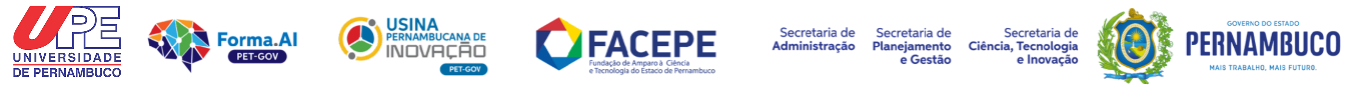

 **Inteligência Artificial, Ciência de dados e Analytics**

Programa de formação de RH-Público em Inteligência Artificial, Ciência de Dados e Analytics (RH.IA-PE)

**Professor Responsável Projeto:** Ph.D. Fernando Buarque de Lima Neto 

**Professor do módulo**: Ph.D. Fernando Buarque de Lima Neto 

Mestrando Gabriel Kopte


---


**Módulo:** 2 - Inteligência Artificial			

**Atividade:** Aula 07 - *Computação Evolucionária* - Algoritmo Genético

# **Exercício de Classe-4: *Computação Evolucionária* - Algoritmo Genético**

## **Algoritmos Genéticos**

São algoritmos de busca heurística adaptativos que pertencem ao grande grupo dos algoritmos evolucionários. A ideia dos GAs é **inspirada na genética e na seleção natural de Charles Darwin. São usados para se obter solução de alta qualidade em problemas combinatoriais, de otimização e de busca.**
 
GAs simulam o processo de seleção natural o que significa que os indivíduos de uma população que mais adaptados às mudanças no ambiente sobrevivem e se reproduzem gerando uma nova geração.




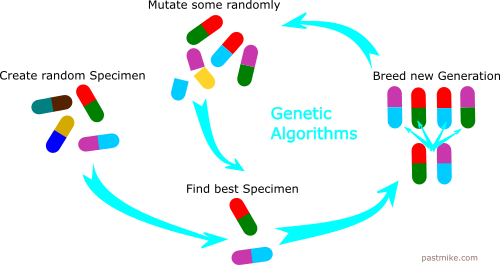

Cada geração consiste em uma população de indivíduos e cada indivíduo consiste em um ponto no espaço de busca e possível solução. Cada indivíduo é representado por um vetor de características (cromossomo).

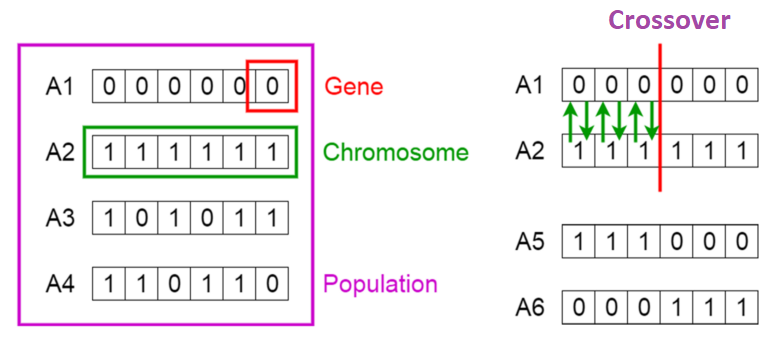

**<u>Mutação</u>** 

A ideia da mutação é inserir uma mudança aleatória nas novas gerações para promover a diversidade da população e evitar uma convergência prematura.

**Fitness Score:**

É atribuído a todos os indivíduos da população e mostra a habilidade do indivíduo de competir. Quanto maior o fitness score maior a chance do indivíduo sobreviver e procriar. Como tamanho da população é estático, os indivíduos menos adaptados "morrem" e são substituídos por novos indivíduos. O objetivo do GA é achar o indivíduo com fitness score ótimo.





**Etapas do GA:**

1. Inicialize a população aleatoriamente.
2. Determine a aptidão do cromossomo.
3. Até terminar, repita:
    1. Selecione os pais (mais aptos).
    2. Execute o cruzamento e a mutação.
    3. Calcule o fitness da nova população.
    4. Anexe-o ao pool genético.

## **Resolvendo o problema do caixeiro viajante (Traveling Salesman Problem) utilizando algoritmo genético - versão Pernambuco**

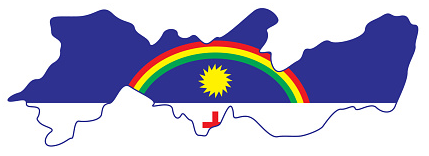

O problema diz que um comerciante precisa visitar um conjunto de cidades de Pernambuco. Partido de Recife, o comerciante deve encontrar o caminho mais curto para visitar cada cidade exatamente uma vez e retornar à capital. 

### **Representação do problema**

**<u>Genes e Cromossomos</u>**

As cidades de Pernambuco isoladas representam genes, já uma lista ordenada de cidades a serem visitadas representa um cromossomo. 

**<u>Fitness Score</u>**

O **Fitness Score** é definido como o **inverso** do comprimento do caminho **total** expresso pelo cromossomo. Quanto maior o **Fitness Score** mais curto é o caminho percorrido. Queremos achar a distância total mínima e isto significa maximizar o **Fitness Score**.

## Implementação

In [ ]:
%%capture
!pip install haversine

Monta Google Drive

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

Carrega bibliotecas básicas

In [ ]:
from random import randint
import random
import numpy as np
import math
from itertools import combinations
import haversine as hs #distância por coordenadas
import folium #mapa
#importa liblioteca para carregar os arquivos json
import json 

### Descrição das funções

A classe `individuo` possui dois atributos: cromossomo e fitness. A estrutura do genoma define o caminho a ser percorrido pelo "caixeiro viajante", enquanto o valor do fitness guarda a distância total percorrida pelo viajante.

In [ ]:
class individuo:
	def __init__(self,cromossomo=[],fitness=0):
		self.cromossomo = cromossomo
		self.fitness = fitness

Função que retorna um número aleatório na faixa de `start`e `end`.



In [ ]:
def rand_num(start, end):
	return randint(start, end-1)

Função para checar se a cidade (gene) já apareceu na lista de cidades (cromossomo)

In [ ]:
def repetido(s, ch):
	for i in range(len(s)):
		if s[i] == ch:
			return True
	return False

Carregamos uma lista de municípios de Pernambuco de uma base de dados em formato json. Depois extraímos os nomes e as coordenadas geográficas dos municípios e guardamos em um dicionário.

In [ ]:
# Lê arquivo json com informações de municípios de Pernambuco
file_path = '/content/drive/Shared drives/Módulo 2 - PET-GOV-RH-IA - Inteligência Artificial/Data/municipios.json'
content = []
with open(file_path, 'r') as j:
  content = json.loads(j.read())
municipios = content['features']

# Cria lista de cidades e dicionário com as coordenadas geográficas
cidades = []
coordinates = {}
for municipio in municipios:
  cidade = municipio['properties']['name']
  cidades.append(cidade)
  coordinates[cidade] = (float(municipio['geometry']['coordinates'][0][1][1]), float(municipio['geometry']['coordinates'][0][1][0]))

# Escolhe aleatoriamente k cidades para compor o problema do TSP
random.seed(a=27)
cidades = random.sample(cidades, k=10)
# Adiciona Recide como cidade de partida e chegada da viagem
cidades.insert(0, 'Recife')
cidades.append('Recife')

In [ ]:
print('Cidades a serem visitadas pelo viajante: {}'.format(cidades))

Cidades a serem visitadas pelo viajante: ['Recife', 'Tacaratu', 'Pedra', 'Verdejante', 'Gravatá', 'Ibirajuba', 'Condado', 'Belo Jardim', 'Belém de Maria', 'Gameleira', 'Saloá', 'Recife']


**Se preferir adicione sua lista de cidades aqui**

In [ ]:
# cidades = ['Recife','Paulista','Ipojuca','Serra Talhada','Petrolina','Cabrobó','Escada','Itambé','Rio Formoso','Recife']

Função que calcula a distância entre duas cidades

In [ ]:
def distance(city1, city2):
   return hs.haversine(coordinates[city1],coordinates[city2])

In [ ]:
print('Distãncia entre Recife e Petrolina é {:.2f} km'.format(distance('Recife','Petrolina')))

Distãncia entre Recife e Petrolina é 621.22 km


Função que retorna `cromossomo` válido. Necessário para criar a população inicial.


In [ ]:
def cria_cromossomo(genes):
  # Separa o primeiro e o último gene (cidade de partida e chegada)
  init = genes[0] 
  end = genes[-1]
  # seleciona aleatoriamente dentro do slice
  random_slice = random.sample(genes[1:(len(genes)-1)], len(genes)-2)
  # reposiciona cidades de partida e chegada no cromossoso
  random_slice.insert(0, init)
  random_slice.append(end)
  return random_slice

In [ ]:
ind_teste = individuo()
ind_teste.cromossomo = cria_cromossomo(cidades)
print('Criando um cromossomo ind_teste -> {}'.format(ind_teste.cromossomo))

Criando um cromossomo ind_teste -> ['Recife', 'Condado', 'Ibirajuba', 'Saloá', 'Belo Jardim', 'Gravatá', 'Pedra', 'Gameleira', 'Tacaratu', 'Belém de Maria', 'Verdejante', 'Recife']


Função que realiza uma mutação em um individuo já existente. A mutação consiste em trocar dois genes escolhidos aleatoriamente de lugar.

In [ ]:
def mutacao(p):
  cromossomo_t = p.cromossomo
  cromossomo_t = list(cromossomo_t)
  v = len(cromossomo_t)-1
  while True:
    r = rand_num(1,v)
    r1 = rand_num(1,v)
    if r1 != r:
      temp = cromossomo_t[r]
      cromossomo_t[r] = cromossomo_t[r1]
      cromossomo_t[r1] = temp
      break
  x_cromossomo = individuo()
  x_cromossomo.cromossomo = cromossomo_t
  return x_cromossomo

In [ ]:
X_ind_teste = mutacao(ind_teste)
print('Inserindo mutação -> {}'.format(X_ind_teste.cromossomo))

Inserindo mutação -> ['Recife', 'Condado', 'Verdejante', 'Saloá', 'Belo Jardim', 'Gravatá', 'Pedra', 'Gameleira', 'Tacaratu', 'Belém de Maria', 'Ibirajuba', 'Recife']


Função que retorna o `fitness` do indivíduo. O valor do `fitness` é 100000 dividido pelo comprimento total do caminho representado pelo `cromossomo`. Desta forma quanto maior o fitness, menor o caminho e melhor é a solução.


In [ ]:
def cal_fitness(cromossomo):
  total_dist = 0
  cromossomo = list(cromossomo)
  for A,B in zip(cromossomo[0:len(cromossomo)-1],cromossomo[1:]):
    # print(type(cromossomo))
    # print('A:{} e B:{}'.format(A,B))
    total_dist = total_dist + distance(A,B)
  return 100000/total_dist

# Converte fitness score em distância
def fitness_2_dist(fitness):
  return 100000/fitness

In [ ]:
fitness_X_ind_teste = cal_fitness(X_ind_teste.cromossomo)
print('Fitness de fitness_X_ind_teste é {:.4f}'.format(fitness_X_ind_teste))

Fitness de fitness_X_ind_teste é 50.1809


In [ ]:
print('Fitness convertido em distância {:.2f} km'.format(fitness_2_dist(fitness_X_ind_teste)))

Fitness convertido em distância 1992.79 km


Função que realiza a reprodução de dois indivíduos "combinando" parte de cada um para gerar um novo indivíduo (*crossing-over*). O ponto da troca é escolhido aleatoriamente.

In [ ]:
def reproducao(ind1,ind2):
  init = randint(1, len(ind1.cromossomo)-2)
  parte1 = ind1.cromossomo[0:init]
  parte2 = ind2.cromossomo[init:(int(len(ind2.cromossomo)))]
  filho = individuo()
  filho.cromossomo = parte1 + parte2
  repetidos = [item for item in filho.cromossomo if (filho.cromossomo.count(item) > 1) and (item!='Recife')]
  faltantes = [item for item in ind1.cromossomo if item not in set(filho.cromossomo)]
  count=0
  for item in repetidos[0:int(len(repetidos)/2)]:
    idx = filho.cromossomo.index(item)
    filho.cromossomo[idx] = faltantes[count]
    count+=1
  return filho

In [ ]:
ind_teste2 = individuo()
ind_teste2.cromossomo = cria_cromossomo(cidades)
print('Criando um cromossomo ind_teste -> {}'.format(ind_teste.cromossomo))
print('Criando um cromossomo ind_teste2 -> {}'.format(ind_teste2.cromossomo))
print('Reprodução...')
ind_filho12 = reproducao(ind_teste,ind_teste2)
print('Criando um cromossomo ind_filho12_1 -> {}'.format(ind_filho12.cromossomo))

Criando um cromossomo ind_teste -> ['Recife', 'Condado', 'Ibirajuba', 'Saloá', 'Belo Jardim', 'Gravatá', 'Pedra', 'Gameleira', 'Tacaratu', 'Belém de Maria', 'Verdejante', 'Recife']
Criando um cromossomo ind_teste2 -> ['Recife', 'Saloá', 'Belo Jardim', 'Gameleira', 'Condado', 'Tacaratu', 'Gravatá', 'Verdejante', 'Belém de Maria', 'Pedra', 'Ibirajuba', 'Recife']
Reprodução...
Criando um cromossomo ind_filho12_1 -> ['Recife', 'Saloá', 'Belo Jardim', 'Gameleira', 'Condado', 'Tacaratu', 'Gravatá', 'Verdejante', 'Belém de Maria', 'Pedra', 'Ibirajuba', 'Recife']


Agora, definimos os hiperparâmetros do algoritmo.

In [ ]:
# Número de cidade visitadas no TPS
V = len(cidades)

# Nome das cidade: A,B,C,D,E (genes) aqui agrupada em um cromossomo
GENES = cidades #"ABCDE"
# A estrutura do genoma define o caminho a ser percorrido pelo
# "caixeiro viajante", enquanto o valor do fitness o inverso da distância total 

# Tamanho inicial da população 
POP_SIZE = 10

# Número total de gerações (iterações)
gen_thres = 1000

# percentual da população será selecionado para reprodução
parent_thrs = 0.4

Criando a polulação inicial

In [ ]:
# Populating the cromossomo pool.
populacao = []
print("\nPolulação inicial:\n")
for i in range(POP_SIZE):
	temp = individuo()
	temp.cromossomo = cria_cromossomo(GENES)
	temp.fitness = cal_fitness(temp.cromossomo)
	populacao.append(temp)
	print('crom={} - fit={:.2f} - dist={:.2f} km'.format(populacao[i].cromossomo, populacao[i].fitness,fitness_2_dist(populacao[i].fitness)))


Polulação inicial:

crom=['Recife', 'Saloá', 'Condado', 'Gravatá', 'Gameleira', 'Ibirajuba', 'Pedra', 'Tacaratu', 'Belo Jardim', 'Verdejante', 'Belém de Maria', 'Recife'] - fit=54.38 - dist=1838.79 km
crom=['Recife', 'Gameleira', 'Pedra', 'Verdejante', 'Gravatá', 'Condado', 'Saloá', 'Belém de Maria', 'Belo Jardim', 'Tacaratu', 'Ibirajuba', 'Recife'] - fit=51.84 - dist=1929.08 km
crom=['Recife', 'Tacaratu', 'Belém de Maria', 'Verdejante', 'Gameleira', 'Ibirajuba', 'Condado', 'Gravatá', 'Saloá', 'Pedra', 'Belo Jardim', 'Recife'] - fit=46.96 - dist=2129.62 km
crom=['Recife', 'Belém de Maria', 'Condado', 'Tacaratu', 'Verdejante', 'Pedra', 'Belo Jardim', 'Gameleira', 'Gravatá', 'Ibirajuba', 'Saloá', 'Recife'] - fit=62.69 - dist=1595.21 km
crom=['Recife', 'Gameleira', 'Gravatá', 'Verdejante', 'Pedra', 'Condado', 'Saloá', 'Tacaratu', 'Belo Jardim', 'Belém de Maria', 'Ibirajuba', 'Recife'] - fit=55.65 - dist=1796.86 km
crom=['Recife', 'Belo Jardim', 'Condado', 'Pedra', 'Verdejante', 'Saloá', 

### **Treinamento**

Aqui é onde o processo de seleção acontece!

In [ ]:
best_fitness = [] # cria lista para guardar melhor fitness de cada geração (para visualização)
worst_fitness = [] # cria lista para guardar pior fitness de cada geração (para visualização)
gen = 0 # inicia  o contador de gerações

# Flag para escolher duas estratégias. 
# True = novos indivuos são criados aleatoriamente toda geração (introduz variabilidade genética)
# False = todo individuo novo é oriundo de reprodução e mutação
flag_novo_ind_gen = False

# Loop principal do GA
while gen <= gen_thres:

  # Ordena população (lista) com base no fitness (maiores fitness vem primeiro)   
  populacao = sorted(populacao, key=lambda d: d.fitness,reverse=True) 

  # Imprime população atual e fitness 
  print('\n\nGeração ' + str(gen) + '\n')
  [print('crom={} - fit={:.2f} - dist={:.2f} km'.format(pop.cromossomo, pop.fitness,fitness_2_dist(pop.fitness))) for pop in populacao]

  # Seleciona os induviduos mais aptos para reprodução
  rep_pop_size = int(parent_thrs*POP_SIZE)
  # quantidade de pais precisa ser par
  if rep_pop_size % 2 != 0:
    rep_pop_size = rep_pop_size+1
  parents = populacao[0:rep_pop_size]
  # Dependendo da estratégia inicial proxima geração com pais ou populacao inteira
  if flag_novo_ind_gen == True:
    offspring = parents
  else:
    offspring = populacao
  count=0

  # Varre a lista com o pais 2 a 2 para reprodução
  # cada filho gerado passa por uma mutação
  # mas a mutação só é aceita se o fitness for maior
  for p1,p2 in zip(parents[0:(len(parents)-1)],parents[1:len(parents)]):
    p1_temp_new = reproducao(p1,p2)   # reprodução
    p1_temp_new.fitness = cal_fitness(p1_temp_new.cromossomo)
    p1_temp_new_x = mutacao(p1_temp_new) # mutação
    p1_temp_new_x.fitness = cal_fitness(p1_temp_new_x.cromossomo)
    # teste de mutação será mantida
    if p1_temp_new_x.fitness > p1_temp_new.fitness:
      p1_temp_new = p1_temp_new_x
    # dependendo da estrategia adiciona filho no final da lista ou no começo
    if flag_novo_ind_gen == True:
      offspring.append(p1_temp_new)
    else:
      # Se flag_novo_ind_gen=False filho é adicionado no começo da lista e 
      # último da lista (menos fit) é extinto
      offspring.insert(0,p1_temp_new)
      offspring.pop()

  # Se estrágia ligada, cria novos individuos aletoriamente 
  # para completar o tamanho da população
  if flag_novo_ind_gen == True:
    for idx in range(len(offspring),POP_SIZE+1):
      p_new = individuo()
      p_new.cromossomo = cria_cromossomo(GENES)
      p_new.fitness = cal_fitness(p_new.cromossomo)
      offspring.append(p_new)
  # Define população para nova geração
  populacao = offspring
  
  # guarda melhores e piores fitness para visualização
  best_fitness.append(max([ind.fitness for ind in populacao]))
  worst_fitness.append(min([ind.fitness for ind in populacao]))
  
  # Incrementa geração
  gen = gen+1   

A saída de streaming foi truncada nas últimas 5000 linhas.
crom=['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife'] - fit=94.26 - dist=1060.91 km
crom=['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife'] - fit=94.26 - dist=1060.91 km


Geração 644

crom=['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife'] - fit=94.26 - dist=1060.91 km
crom=['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife'] - fit=94.26 - dist=1060.91 km
crom=['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife'] - fit=94.26 - dist=1060.91 km
crom=['Recife', 'Cond

### **Checando a convergência**

Text(0.5, 0, 'Geração')

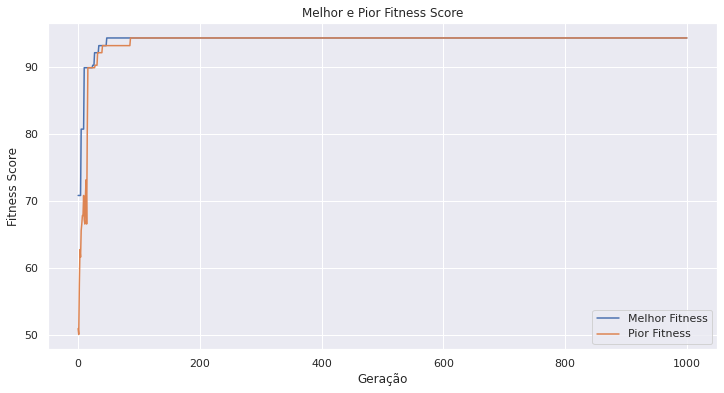

In [ ]:
import seaborn as sns
ax = sns.set(rc={'figure.figsize':(12, 6)})
ax = sns.lineplot( data=best_fitness, label="Melhor Fitness")
ax = sns.lineplot( data=worst_fitness, label="Pior Fitness")
ax.set_title("Melhor e Pior Fitness Score")
ax.set_ylabel('Fitness Score')
ax.set_xlabel('Geração')

Melhor solução

In [ ]:
populacao = sorted(populacao, key=lambda d: d.fitness,reverse=True)
print('Melhor caminho: {}\nFitness Score: {:.4f}\nDistância total: {:.2f} km'.format(populacao[0].cromossomo,populacao[0].fitness,fitness_2_dist(populacao[0].fitness)))

Melhor caminho: ['Recife', 'Condado', 'Belo Jardim', 'Pedra', 'Verdejante', 'Tacaratu', 'Saloá', 'Ibirajuba', 'Belém de Maria', 'Gameleira', 'Gravatá', 'Recife']
Fitness Score: 94.2585
Distância total: 1060.91 km


### **Visualizando a solução no mapa!**

Plota nossa melhor solução no mapa utilizando a biblioteca `folium`

In [ ]:
map = folium.Map(location=[-7.9411579023, -34.9883822487], zoom_start = 7.4)   
tour = populacao[0].cromossomo
points = []
for city in tour:
  points.append(coordinates[city])
points.append(points[0])
folium.PolyLine(points).add_to(map)
map

#### Referências

1. A. Lambora, K. Gupta and K. Chopra, "Genetic Algorithm- A Literature Review," 2019 International Conference on Machine Learning, Big Data, Cloud and Parallel Computing (COMITCon), 2019, pp. 380-384, doi: 10.1109/COMITCon.2019.8862255. (https://ieeexplore.ieee.org/document/8862255)
2. https://www.geeksforgeeks.org/genetic-algorithms/
3. https://www.geeksforgeeks.org/traveling-salesman-problem-using-genetic-algorithm/
4. https://pastmike.com/traveling-salesman-genetic-algorithm/